In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics.pairwise import cosine_similarity


veri1 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Books.csv",sep=";")
veri2 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Ratings.csv",sep=";")
veri3 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Users.csv",sep=";")
veri2.columns


C:\Users\Burak\AppData\Local\Temp\ipykernel_18276\3683280021.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  veri3 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Users.csv",sep=";")


Index(['User-ID', 'ISBN', 'Rating'], dtype='object')

In [10]:
veri1 = pd.merge(veri1,veri2,on="ISBN")
veri = pd.merge(veri1,veri3,on="User-ID")


In [11]:
veri.isna().any()

ISBN         False
Title        False
Author        True
Year         False
Publisher     True
User-ID      False
Rating       False
Age           True
dtype: bool

In [18]:
veri[veri["Author"].isnull()]
veri["Author"] = veri["Author"].fillna("Yazar Bilinmiyor")
veri["Publisher"] = veri["Publisher"].fillna("Yayıncı Bilinmiyor")
veri = veri.drop("Age",axis=1)



In [13]:
veri.isna().any()

ISBN         False
Title        False
Author       False
Year         False
Publisher    False
User-ID      False
Rating       False
dtype: bool

In [14]:
veri

,ISBN,Title,Author,Year,Publisher,User-ID,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,8,0
...,...,...,...,...,...,...,...
971838,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8
971839,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8
971840,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10
971841,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,259679,6


In [15]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971843 entries, 0 to 971842
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       971843 non-null  object
 1   Title      971843 non-null  object
 2   Author     971843 non-null  object
 3   Year       971843 non-null  int64 
 4   Publisher  971843 non-null  object
 5   User-ID    971843 non-null  object
 6   Rating     971843 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 51.9+ MB


In [16]:
veri.nunique()

ISBN         261804
Title        233721
Author        98761
Year            112
Publisher     16423
User-ID       86677
Rating           11
dtype: int64

<Axes: >

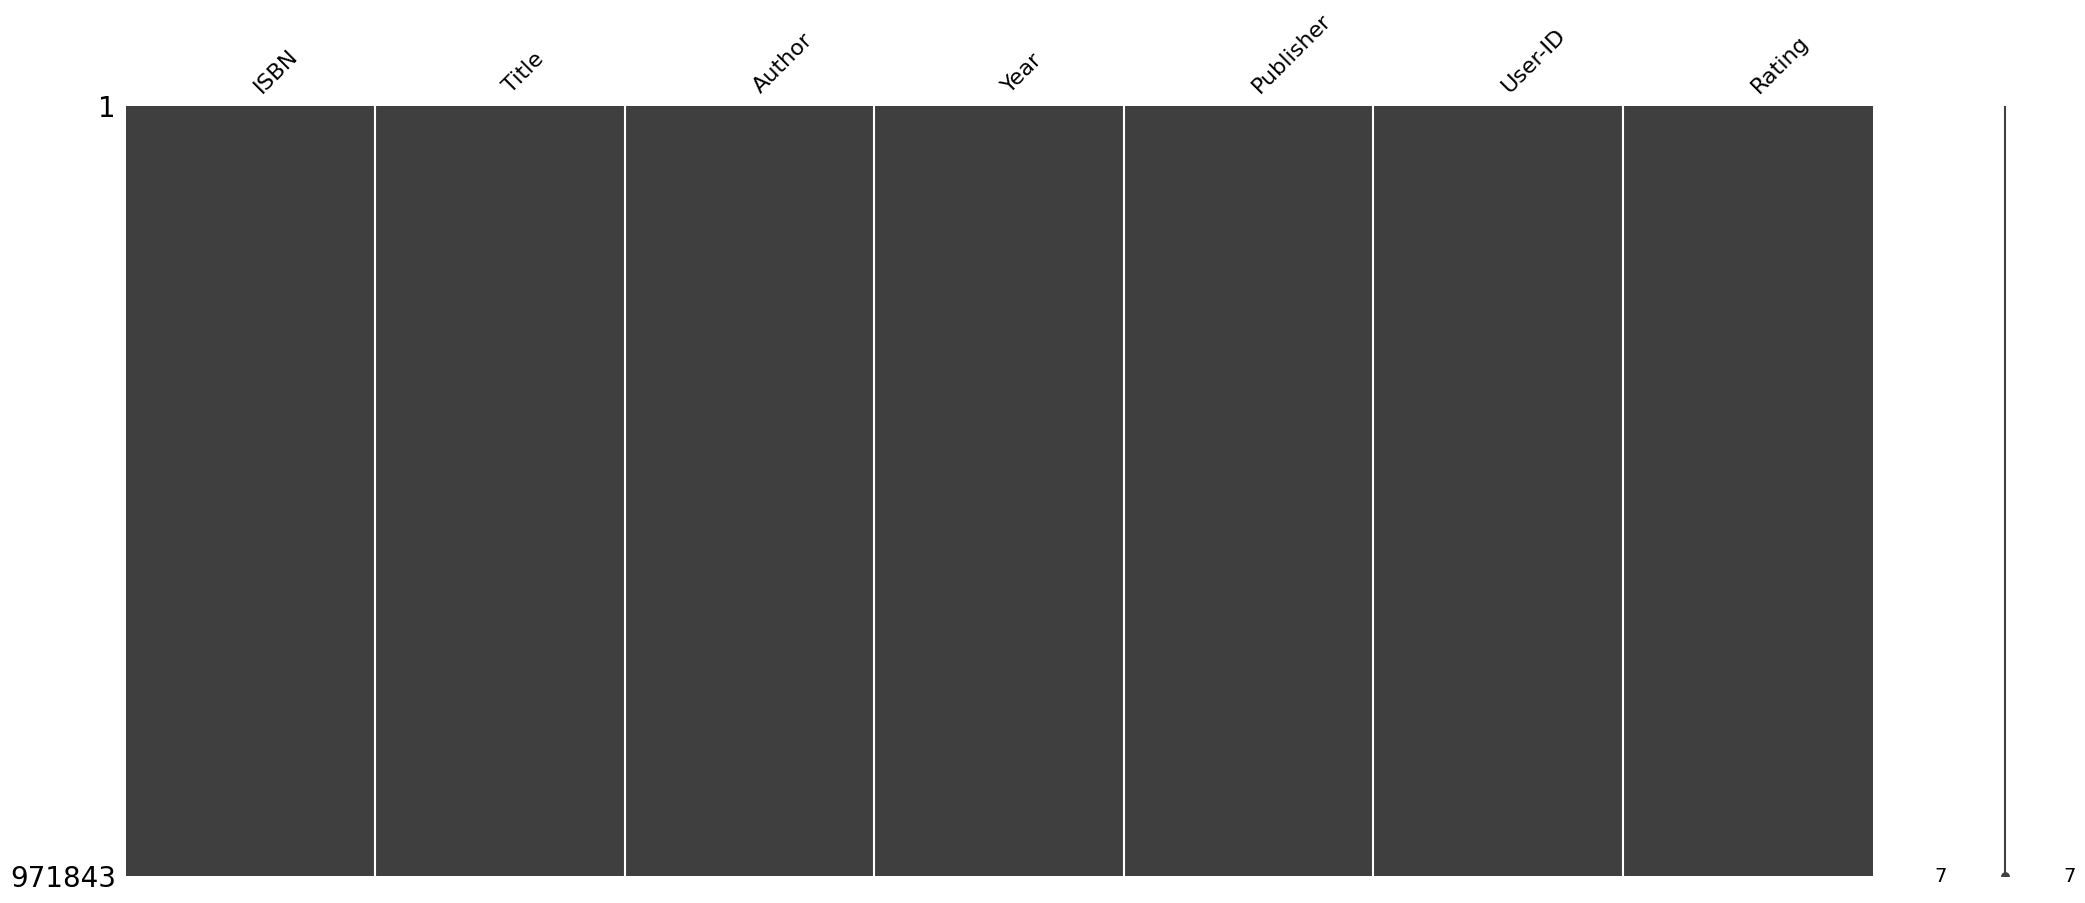

In [27]:
msno.matrix(veri)

In [28]:
veri

,ISBN,Title,Author,Year,Publisher,User-ID,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,8,0
...,...,...,...,...,...,...,...
971838,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8
971839,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8
971840,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10
971841,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,259679,6


In [29]:
veri["Rating"].value_counts()

Rating
0     608309
8      86832
10     67803
7      62750
9      57726
5      42990
6      29903
4       7103
3       4825
2       2207
1       1395
Name: count, dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
def grafik(df, column, title, x_label, y_label,top=20):
    pl = df[column].value_counts().head(top)
    ax = sns.barplot(data=df,x=pl.index, y=pl.values)
    ax.set(xlabel=x_label,ylabel=y_label,title=title)
    plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


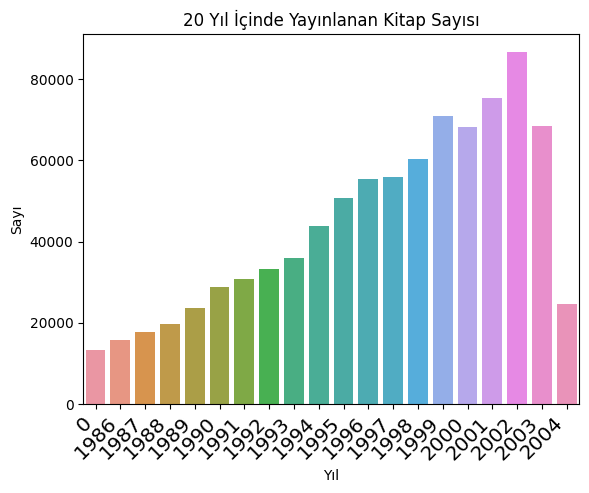

In [25]:
grafik(veri, 'Year', '20 Yıl İçinde Yayınlanan Kitap Sayısı', "Yıl", "Sayı")

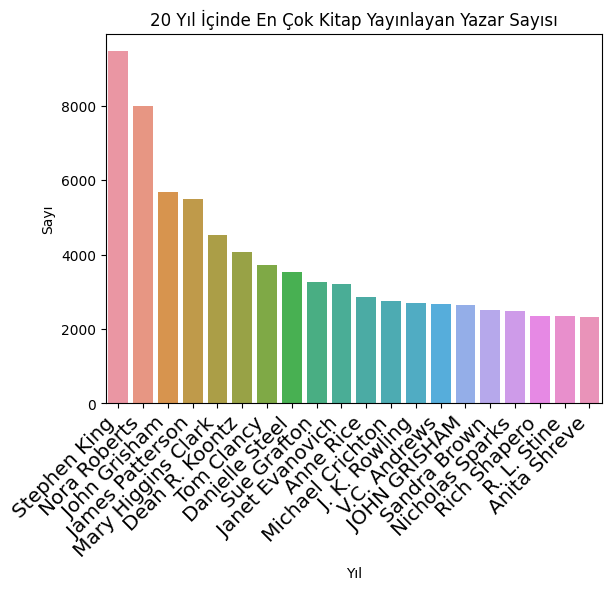

In [28]:
grafik(veri, 'Author', '20 Yıl İçinde En Çok Kitap Yayınlayan Yazar Sayısı', "Yıl", "Sayı")

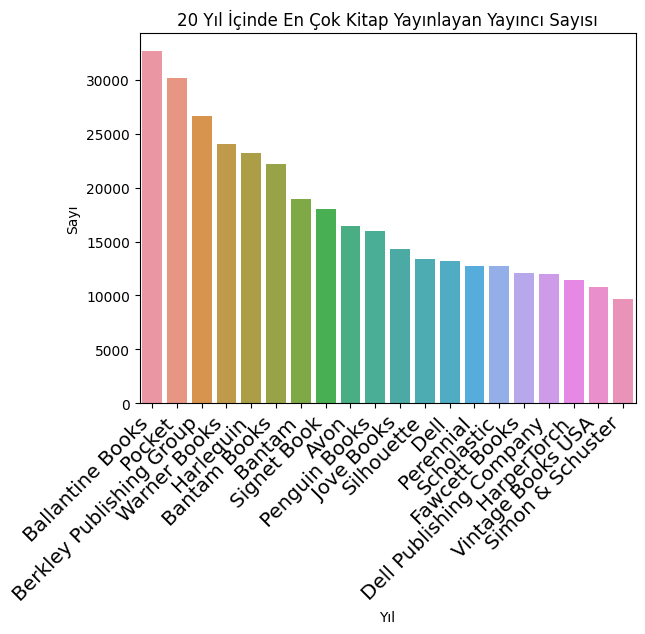

In [30]:
grafik(veri, 'Publisher', '20 Yıl İçinde En Çok Kitap Yayınlayan Yayıncı Sayısı', "Yıl", "Sayı")

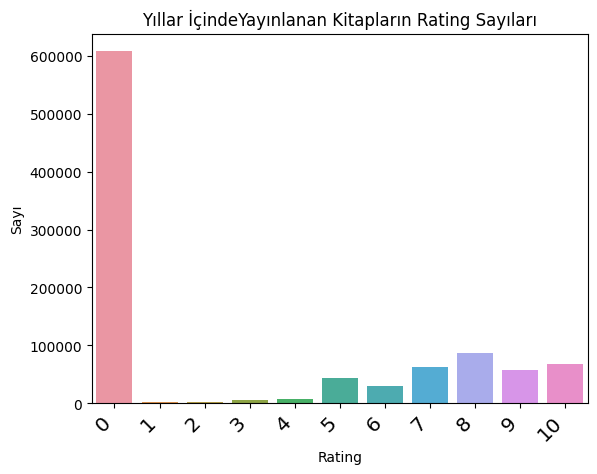

In [36]:
grafik(veri, 'Rating', 'Yıllar İçindeYayınlanan Kitapların Rating Sayıları', "Rating", "Sayı",top=len(veri["Rating"]))

In [69]:
yazarlar = veri['Author'].value_counts().head(20)
yazarlar = list(yazarlar.index)
yazarlar

['Stephen King',
 'Nora Roberts',
 'John Grisham',
 'James Patterson',
 'Mary Higgins Clark',
 'Dean R. Koontz',
 'Tom Clancy',
 'Danielle Steel',
 'Sue Grafton',
 'Janet Evanovich',
 'Anne Rice',
 'Michael Crichton',
 'J. K. Rowling',
 'V.C. Andrews',
 'JOHN GRISHAM',
 'Sandra Brown',
 'Nicholas Sparks',
 'Rich Shapero',
 'R. L. Stine',
 'Anita Shreve']

In [68]:
yazar = pd.DataFrame(columns = veri.columns)

for author in yazarlar:
    
    cond_df = veri[veri['Author'] == author]
    
    yazar =  pd.concat([yazar, cond_df], axis=0)

yazar
    
    

,ISBN,Title,Author,Year,Publisher,User-ID,Rating
120,0671042858,The Girl Who Loved Tom Gordon,Stephen King,2000,Pocket,11676,10
159,0451162072,Pet Sematary,Stephen King,1994,Signet Book,11676,8
247,0743424425,The Shining,Stephen King,2001,Pocket,11676,0
360,0743211383,Dreamcatcher,Stephen King,2001,Scribner,11676,8
372,0451155750,The Dead Zone,Stephen King,2004,Signet Book,11676,0
...,...,...,...,...,...,...,...
930787,0316734837,Fortune's Rocks : A Novel,Anita Shreve,2002,"Little, Brown",62332,0
930788,0316734837,Fortune's Rocks : A Novel,Anita Shreve,2002,"Little, Brown",159981,0
930789,0316734837,Fortune's Rocks : A Novel,Anita Shreve,2002,"Little, Brown",192426,10
947988,0316713732,The Last Time They Met: A Novel,Anita Shreve,2003,"Little, Brown",147759,0


In [80]:
ilk20yazar = yazar[yazar['Rating'] != 0]
ilk20yazar = ilk20yazar.groupby('Author')['Rating'].agg('mean').reset_index().sort_values(by='Rating', ascending=False)
ilk20yazar


,Author,Rating
4,J. K. Rowling,8.985222
7,Janet Evanovich,7.961431
16,Stephen King,7.802881
11,Nicholas Sparks,7.758979
6,James Patterson,7.711377
17,Sue Grafton,7.71012
12,Nora Roberts,7.706691
5,JOHN GRISHAM,7.630784
3,Dean R. Koontz,7.579208
0,Anita Shreve,7.558974


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

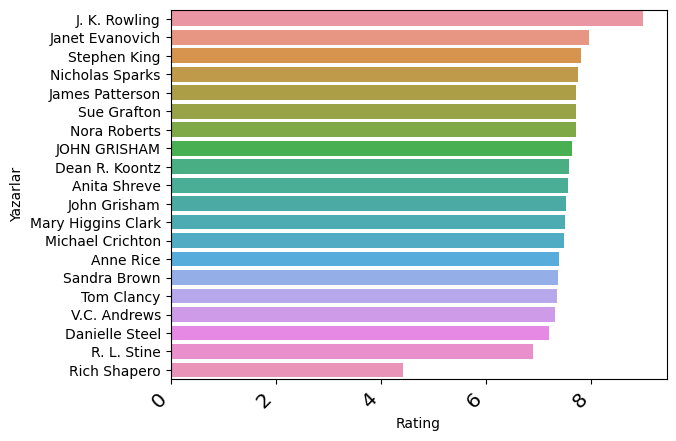

In [81]:
ax = sns.barplot(data=ilk20yazar,x=ilk20yazar["Rating"], y=ilk20yazar["Author"])
ax.set(xlabel="Rating",ylabel="Yazarlar")
plt.xticks(
rotation=45, 
horizontalalignment='right',
fontweight='light',
fontsize='x-large'  
)

In [78]:
yayıncı = veri['Publisher'].value_counts().head(20)
yayıncı = list(yayıncı.index)

yayıncılar = pd.DataFrame(columns = veri.columns)

for pub in yayıncı:
    
    cond_df = veri[veri['Publisher'] == pub]
    
    yayıncılar =  pd.concat([yayıncılar, cond_df], axis=0)
    
    
ilk20yayıncı = yayıncılar[yayıncılar['Rating'] != 0]
ilk20yayıncı = yayıncılar.groupby('Publisher')['Rating'].agg('mean').reset_index().sort_values(by='Rating', ascending=False)

ilk20yayıncı

,Publisher,Rating
12,Perennial,3.366685
11,Penguin Books,3.221001
18,Vintage Books USA,3.209456
17,Simon & Schuster,2.889544
2,Bantam,2.887986
1,Ballantine Books,2.813659
15,Signet Book,2.70347
19,Warner Books,2.679682
9,HarperTorch,2.633383
5,Dell,2.50365


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0')])

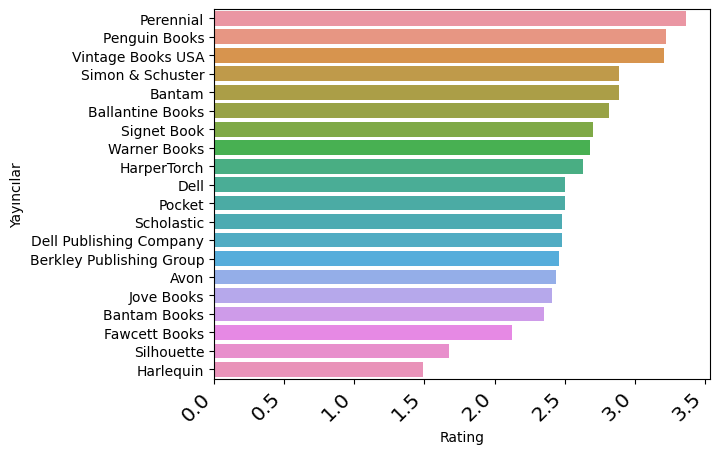

In [83]:
ax = sns.barplot(data=ilk20yayıncı,x=ilk20yayıncı["Rating"], y=ilk20yayıncı["Publisher"])
ax.set(xlabel="Rating",ylabel="Yayıncılar")
plt.xticks(
rotation=45, 
horizontalalignment='right',
fontweight='light',
fontsize='x-large'  
)

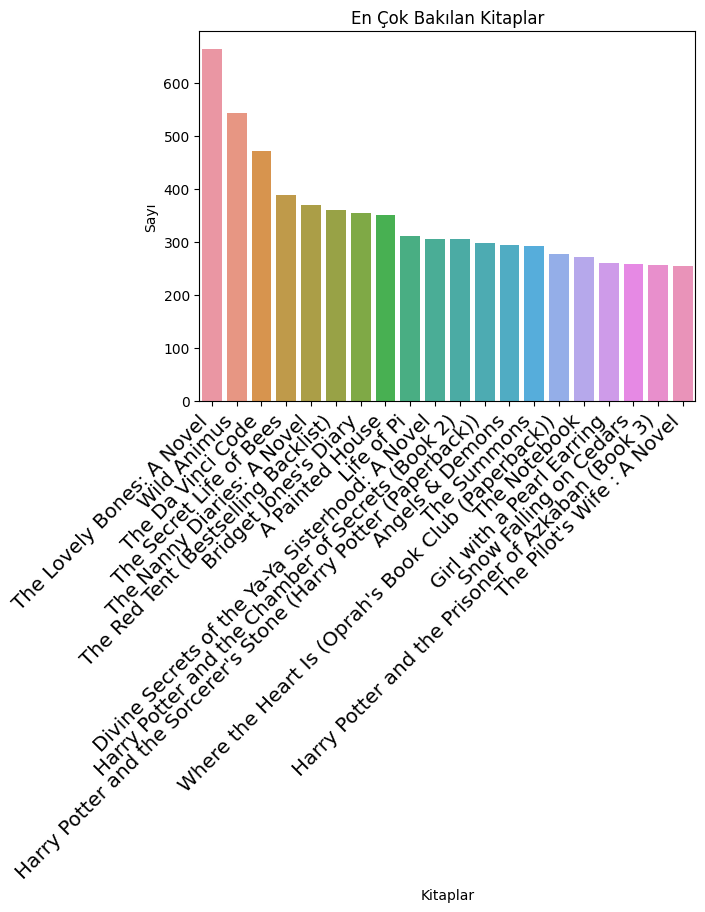

In [95]:
grafik(veri[veri['Rating'] != 0], 'Title', "En Çok Bakılan Kitaplar",x_label="Kitaplar",y_label="Sayı")

In [103]:
kitap = veri['Title'].value_counts().head(20)
kitap = list(kitap.index)

kitaplar = pd.DataFrame(columns = veri.columns)

for book in kitap:
    
    cond_df = veri[veri['Title'] == book]
    
    kitaplar =  pd.concat([kitaplar, cond_df], axis=0)
    
    
ilk20kitap = kitaplar[kitaplar['Rating'] != 0]
ilk20kitap = kitaplar.groupby('Title')['Rating'].agg('mean').reset_index().sort_values(by='Rating', ascending=False)

ilk20kitap

,Title,Rating
8,The Da Vinci Code,4.652989
15,The Secret Life of Bees,4.5171
10,The Lovely Bones: A Novel,4.481818
14,The Red Tent (Bestselling Backlist),4.288856
18,Where the Heart Is (Oprah's Book Club (Paperba...,4.07804
5,Life of Pi,3.9952
1,Angels & Demons,3.723539
12,The Notebook,3.578773
2,Bridget Jones's Diary,3.533943
11,The Nanny Diaries: A Novel,3.469543


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'The Da Vinci Code'),
  Text(1, 0, 'The Secret Life of Bees'),
  Text(2, 0, 'The Lovely Bones: A Novel'),
  Text(3, 0, 'The Red Tent (Bestselling Backlist)'),
  Text(4, 0, "Where the Heart Is (Oprah's Book Club (Paperback))"),
  Text(5, 0, 'Life of Pi'),
  Text(6, 0, 'Angels & Demons'),
  Text(7, 0, 'The Notebook'),
  Text(8, 0, "Bridget Jones's Diary"),
  Text(9, 0, 'The Nanny Diaries: A Novel'),
  Text(10, 0, 'The Summons'),
  Text(11, 0, 'Divine Secrets of the Ya-Ya Sisterhood: A Novel'),
  Text(12, 0, 'Summer Sisters'),
  Text(13, 0, 'Snow Falling on Cedars'),
  Text(14, 0, 'A Painted House'),
  Text(15, 0, 'The Testament'),
  Text(16, 0, "The Girls' Guide to Hunting and Fishing"),
  Text(17, 0, 'House of Sand and Fog'),
  Text(18, 0, 'The Pelican Brief'),
  Text(19, 0, 'Wild Animus')])

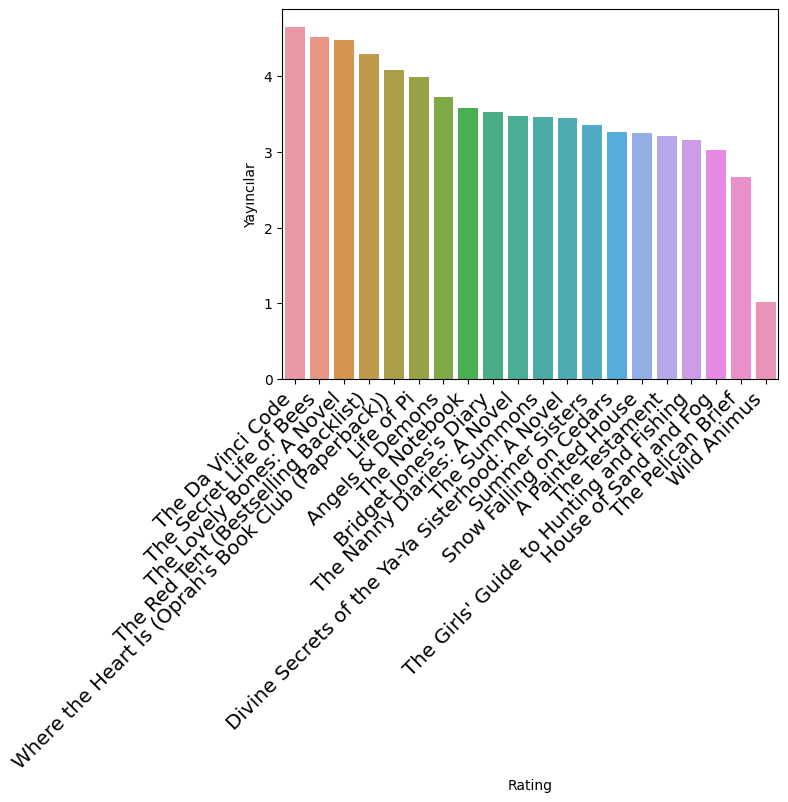

In [106]:
ax = sns.barplot(data=ilk20kitap,x=ilk20kitap["Title"], y=ilk20kitap["Rating"])
ax.set(xlabel="Rating",ylabel="Yayıncılar")
plt.xticks(
rotation=45, 
horizontalalignment='right',
fontweight='light',
fontsize='x-large'  
)

In [110]:
def popüler_kitaplar():
    
    for (book, ratings) in zip(ilk20kitap['Title'], ilk20kitap['Rating']):
        print(book)
        print("Rating",end='->')
        print(round(ratings,1))
        
popüler_kitaplar()

The Da Vinci Code
Rating->4.7
The Secret Life of Bees
Rating->4.5
The Lovely Bones: A Novel
Rating->4.5
The Red Tent (Bestselling Backlist)
Rating->4.3
Where the Heart Is (Oprah's Book Club (Paperback))
Rating->4.1
Life of Pi
Rating->4.0
Angels & Demons
Rating->3.7
The Notebook
Rating->3.6
Bridget Jones's Diary
Rating->3.5
The Nanny Diaries: A Novel
Rating->3.5
The Summons
Rating->3.5
Divine Secrets of the Ya-Ya Sisterhood: A Novel
Rating->3.4
Summer Sisters
Rating->3.4
Snow Falling on Cedars
Rating->3.3
A Painted House
Rating->3.2
The Testament
Rating->3.2
The Girls' Guide to Hunting and Fishing
Rating->3.2
House of Sand and Fog
Rating->3.0
The Pelican Brief
Rating->2.7
Wild Animus
Rating->1.0


## İtem Tabanlı Tavsiye Sistemi

In [130]:
kitap_sayısı = pd.DataFrame(veri['Title'].value_counts())
kitap_sayısı.columns = ["Kitap Sayısı"]
kitap_sayısı


,Kitap Sayısı
Title,
Wild Animus,2357
The Lovely Bones: A Novel,1210
The Da Vinci Code,853
A Painted House,794
The Nanny Diaries: A Novel,788
...,...
Part of My Soul Went With Him,1
The Complete Book of Food Combining,1
Buying a Home in Spain 2003-2004 (Buying a Home),1


In [131]:
kitap_sayısı=kitap_sayısı[kitap_sayısı["Kitap Sayısı"]<=100].index
kitap_sayısı[:5]

Index(['Eleventh Hour: An FBI Thriller (FBI Thriller (Jove Paperback))',
       'The Witness', 'Sleep No More', 'Reap the Wind', 'No One to Trust'],
      dtype='object', name='Title')

In [132]:
kitap_sayısı=veri[~veri["Title"].isin(kitap_sayısı)]
kitap_sayısı.head()

,ISBN,Title,Author,Year,Publisher,User-ID,Rating
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7


In [133]:
kitap_sayısı.shape

(165905, 7)

In [136]:
tavsiyesistemi = kitap_sayısı.pivot_table(index=["User-ID"],columns=["Title"],values="Rating")


In [143]:
kitap_adı = 'Me Talk Pretty One Day'
ad = tavsiyesistemi[kitap_adı]
tavsiye=pd.DataFrame(tavsiyesistemi.corrwith(ad).sort_values(ascending=False)).reset_index(drop=False)
tavsiye

,Title,0
0,The Woman Next Door,1.0
1,The Reef,1.0
2,Daddy,1.0
3,Engaging The Enemy,1.0
4,Me Talk Pretty One Day,1.0
...,...,...
833,Sword of Shannara,NaN
834,Tears of the Moon (Irish Trilogy),NaN
835,The Bourne Supremacy,NaN
836,The Sum of All Fears,NaN


In [150]:
for (aday_kitap, korelasyon) in zip(tavsiye['Title'], tavsiye[0]):
    korelasyon_eşiği = 0.7
    if korelasyon > korelasyon_eşiği:
        ratings = veri[veri['Title'] == aday_kitap]['Rating'].mean()
        print(aday_kitap)
        print("Rating ", end = '->')
        print(round(ratings,1))
        print("-"*50)
    else:
        break

The Woman Next Door
Rating ->2.7
--------------------------------------------------
The Reef
Rating ->2.0
--------------------------------------------------
Daddy
Rating ->1.5
--------------------------------------------------
Engaging The Enemy
Rating ->2.7
--------------------------------------------------
Me Talk Pretty One Day
Rating ->3.7
--------------------------------------------------
Absolute Power
Rating ->2.5
--------------------------------------------------
Heartbeat
Rating ->1.9
--------------------------------------------------
Atlantis Found
Rating ->3.4
--------------------------------------------------
The Shelters of Stone (Earth's Children Series, No 5)
Rating ->3.8
--------------------------------------------------
The Eye of the World (The Wheel of Time, Book 1)
Rating ->3.7
--------------------------------------------------
Good Harbor: A Novel
Rating ->2.6
--------------------------------------------------
The Copper Beech
Rating ->2.1
-------------------------

In [153]:
kitap_adı = 'Life of Pi'
ad = tavsiyesistemi[kitap_adı]
tavsiye=pd.DataFrame(tavsiyesistemi.corrwith(ad).sort_values(ascending=False)).reset_index(drop=False)
tavsiye

,Title,0
0,Life of Pi,1.000000
1,See How They Run,0.956056
2,Midnight,0.895497
3,The Woman Next Door,0.830878
4,Vanished,0.825442
...,...,...
833,Fatal Cure,NaN
834,Guilty as Sin,NaN
835,Homeport,NaN
836,Long After Midnight,NaN


In [154]:
for (aday_kitap, korelasyon) in zip(tavsiye['Title'], tavsiye[0]):
    korelasyon_eşiği = 0.7
    if korelasyon > korelasyon_eşiği:
        ratings = veri[veri['Title'] == aday_kitap]['Rating'].mean()
        print(aday_kitap)
        print("Rating ", end = '->')
        print(round(ratings,1))
        print("-"*50)
    else:
        break

Life of Pi
Rating ->4.0
--------------------------------------------------
See How They Run
Rating ->1.9
--------------------------------------------------
Midnight
Rating ->2.6
--------------------------------------------------
The Woman Next Door
Rating ->2.7
--------------------------------------------------
Vanished
Rating ->2.6
--------------------------------------------------
A Darkness More Than Night
Rating ->2.9
--------------------------------------------------
Accident
Rating ->2.6
--------------------------------------------------
Welcome to Temptation
Rating ->2.1
--------------------------------------------------
Thousand Acres
Rating ->1.9
--------------------------------------------------
Survival of the Fittest: An Alex Delaware Novel
Rating ->2.2
--------------------------------------------------
Nights in Rodanthe
Rating ->3.5
--------------------------------------------------
Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))
Rating ->1.4
-----------------

In [168]:
kitap_adı =  "The Winner"
ad = tavsiyesistemi[kitap_adı]
tavsiye=pd.DataFrame(tavsiyesistemi.corrwith(ad).sort_values(ascending=False)).reset_index(drop=False)
tavsiye



,Title,0
0,Song of Solomon (Oprah's Book Club (Paperback)),1.0
1,Of Mice and Men (Penguin Great Books of the 20...,1.0
2,Year of Wonders,1.0
3,Red Rabbit,1.0
4,Back When We Were Grownups : A Novel (Ballanti...,1.0
...,...,...
833,Watchers,NaN
834,While My Pretty One Sleeps,NaN
835,White Teeth: A Novel,NaN
836,Winter Moon,NaN


In [169]:
for (aday_kitap, korelasyon) in zip(tavsiye['Title'], tavsiye[0]):
    korelasyon_eşiği = 0.7
    if korelasyon > korelasyon_eşiği:
        ratings = veri[veri['Title'] == aday_kitap]['Rating'].mean()
        print(aday_kitap)
        print("Rating ", end = '->')
        print(round(ratings,1))
        print("-"*50)
    else:
        break

Song of Solomon (Oprah's Book Club (Paperback))
Rating ->2.8
--------------------------------------------------
Of Mice and Men (Penguin Great Books of the 20th Century)
Rating ->3.8
--------------------------------------------------
Year of Wonders
Rating ->4.3
--------------------------------------------------
Red Rabbit
Rating ->2.7
--------------------------------------------------
Back When We Were Grownups : A Novel (Ballantine Reader's Circle)
Rating ->3.8
--------------------------------------------------
A Fine Balance
Rating ->3.0
--------------------------------------------------
The Fountainhead
Rating ->4.2
--------------------------------------------------
The Winner
Rating ->2.9
--------------------------------------------------
Evening Class
Rating ->3.2
--------------------------------------------------
Choke
Rating ->3.2
--------------------------------------------------
The Key to Midnight
Rating ->2.1
--------------------------------------------------
Homeport
Ratin

## Kullanıcı Tabanlı Tavsiye Sistemi

In [3]:
veri1 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Books.csv",sep=";")
veri2 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Ratings.csv",sep=";")
veri3 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Users.csv",sep=";")


veri1 = pd.merge(veri1,veri2,on="ISBN")
veri = pd.merge(veri1,veri3,on="User-ID")
veri

C:\Users\Burak\AppData\Local\Temp\ipykernel_18276\3244272990.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  veri3 = pd.read_csv("C:\\Users\\Burak\\Desktop\\BootcampProje\\book\\Users.csv",sep=";")


,ISBN,Title,Author,Year,Publisher,User-ID,Rating,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,8,0,NaN
...,...,...,...,...,...,...,...,...
971838,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8,19
971839,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8,39
971840,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10,22
971841,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,259679,6,27


In [4]:
kullanıcı=veri[veri['User-ID'].map(veri['User-ID'].value_counts()) > 100] 
kullanıcı

,ISBN,Title,Author,Year,Publisher,User-ID,Rating,Age
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,NaN
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,NaN
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,11676,8,NaN
83,0771074670,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,11676,0,NaN
84,0440234743,The Testament,John Grisham,1999,Dell,11676,9,NaN
...,...,...,...,...,...,...,...,...
899561,0263827461,A Poor Relation (Historical Romance: Regency),Joanna Maitland,2001,Harlequin Mills & Boon Ltd,163759,5,37
899562,0263816575,Mistress of Madderlea (Historical Romance: Reg...,Mary Nichols,1999,Harlequin Mills & Boon Ltd,163759,5,37
899563,0440222974,A Fire in Heaven,Annee Carter,1998,Dell Publishing Company,163759,5,37
899564,0373059191,Mr. Easy (Man Of The Month) (Silhouette Desir...,Cait London,1995,Silhouette,163759,4,37


In [5]:
kullanıcı_matrisi=kullanıcı.pivot_table(index=["User-ID"],columns=["Title"],values="Rating")


In [6]:
kullanıcı["User-ID"].value_counts()

User-ID
11676     11145
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
126697      101
175636      101
110746      101
187410      101
30806       101
Name: count, Length: 1560, dtype: int64

In [7]:
kullanıcı_id =126697                  
belirli_kullanıcı=kullanıcı[kullanıcı["User-ID"]==kullanıcı_id].sort_values(["Rating"],ascending=False)[0:20]
belirli_kullanıcı.head()

,ISBN,Title,Author,Year,Publisher,User-ID,Rating,Age
721232,037540435X,Timeline,Michael Crichton,1999,Random House Audio,126697,10,30
721308,1562478494,A Song for Jeffrey (Ag Fiction (American Girl)),Constance M. Foland,1999,Pleasant Company Publications,126697,10,30
721233,0380762277,"20,001 Names For Baby : Revised and Updated",Carol McD. Wallace,1992,Avon,126697,10,30
721281,1564563111,"In whose best interest?: One child's odyssey, ...",John Seita,1996,Continental Press,126697,10,30
721227,0517266555,Just So Stories,RUDYARD KIPLING,2003,Gramercy,126697,10,30


In [8]:
index=np.where(kullanıcı_matrisi.index==kullanıcı_id)[0][0]
index

726

In [9]:
kullanıcı_matrisi.fillna(0, inplace=True)
benzerlik=cosine_similarity(kullanıcı_matrisi)
benzerlik[0]

array([1.        , 0.06041905, 0.        , ..., 0.        , 0.01265114,
       0.02279257])

In [10]:
benzer_kullanıcılar = list(enumerate(benzerlik[index]))
benzer_kullanıcılar[:5]

[(0, 0.0319307878818531), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]

In [11]:
benzer_kullanıcılar = sorted(benzer_kullanıcılar,key = lambda x:x[1],reverse=True)[1:6]
benzer_kullanıcılar

[(1070, 0.10682517037726925),
 (684, 0.0949126327067381),
 (187, 0.09325269813601383),
 (1402, 0.08890947216782379),
 (1493, 0.08207999618492187)]

In [12]:
benzer_kullanıcılar_id=[]
for i in benzer_kullanıcılar:
        benzer=veri[veri["User-ID"]==kullanıcı_matrisi.index[i[0]]]
        benzer_kullanıcılar_id.extend(list(benzer.drop_duplicates("User-ID")["User-ID"].values))

benzer_kullanıcılar_id

[180917, 120090, 32122, 238961, 250645]

In [13]:
x=kullanıcı[kullanıcı["User-ID"]==kullanıcı_id]
tavsiye_kitaplar=[]
user=list(benzer_kullanıcılar_id)
for i in user:
    y=kullanıcı[(kullanıcı["User-ID"]==i)]
    sim_books=y.loc[~y["Title"].isin(x["Title"]),:]
    sim_books=sim_books.sort_values(["Rating"],ascending=False)[0:5]
    tavsiye_kitaplar.extend(sim_books["Title"].values)
    
tavsiye_kitaplar

['The Hunt for Red October',
 'Atlantis Found',
 'Quickie Comebacks',
 'Jackie Robinson (Black Americans of Achievement (Hardcover))',
 'Mary Baker Eddy: Founder Christian Science (American Women of Achievement)',
 'The Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'Scimitar',
 'Clear and Present Danger',
 'Tis : A Memoir',
 'Airframe',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Nicolae: The Rise of Antichrist (Left Behind No. 3)',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 'Have a Nice Day!: A Tale of Blood and Sweatsocks',
 'Ruby (Landry)',
 'Flowers for Algernon',
 'Wacky Animal Tracing Fun',
 'Wee Sing Nursery Rhymes & Lullabies',
 'The University of Chicago Spanish - English English - Spanish Dictionary',
 'What Would Jesus Do?',
 'I Still Hate Cats',
 '1001 Ways to Energize Employees',
 'The Chamber',
 'Ottawa With the Kids',
 'Organize Your Office : Revised Routines for Managing Your Workspace']

## KNN Modeli

In [140]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [143]:
veri

,ISBN,Title,Author,Year,Publisher,User-ID,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,8,0
...,...,...,...,...,...,...,...
971838,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8
971839,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8
971840,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10
971841,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,259679,6


In [145]:
yeni_veri = veri.iloc[:100000,:]
yeni_veri= yeni_veri.pivot_table(index = "Title",columns = "User-ID",values = "Rating").fillna(0)
yeni_veri_matrisi = csr_matrix(yeni_veri.values)

In [146]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=7, n_jobs=-1)

In [148]:
knn.fit(yeni_veri_matrisi)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=7)

In [169]:
kitap = np.random.choice(yeni_veri.shape[0])
print(kitap)
korelasyon, indeks = knn.kneighbors(yeni_veri.iloc[kitap,:].values.reshape(1, -1), n_neighbors = 10)

16783


In [171]:
for i in range(0, len(korelasyon.flatten())):
    if i == 0:
        print('{0} Kitabı İçin Tavsiye Edilen Kitaplar :\n'.format(yeni_veri.index[kitap]))
    else:
        print('{0}: {1}, korelasyonu {2}:'.format(i, yeni_veri.index[indeks.flatten()[i]], korelasyon.flatten()[i]))

Great Lion of God. Kitabı İçin Tavsiye Edilen Kitaplar :

1: Small leather journal with strap-myra series, korelasyonu 1.0:
2: Smart Guide to Boosting Your Energy, korelasyonu 1.0:
3: Smart Dragons, Foolish Elves, korelasyonu 1.0:
4: Smallest Cow in the World (I Can Read), korelasyonu 1.0:
5: Smart Guide to Relieving Stress, korelasyonu 1.0:
6: Small World, korelasyonu 1.0:
7: Small World: an Academic Romance, korelasyonu 1.0:
8: Smart Money Moves for African Americans, korelasyonu 1.0:
9: Small is Beautiful-Perennial, korelasyonu 1.0:
